In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('review.csv')
data

,Unnamed: 0,RATING,REVIEWS,PRODUCT
0,0,4,"Nice ,\ngood job",Headphones
1,1,4,Excellent,Headphones
2,2,5,After careful consideration of similar prodcut...,Router
3,3,4,Good,Router
4,4,5,Superb product I like it\nBest part is photo p...,Printers
...,...,...,...,...
18754,18754,3,Good enough... but iPhone users should note th...,Smart_phones
18755,18755,5,Better for students,Laptop
18756,18756,5,"Amzing speaker, have bought 2 sets of them.",Home_theatre
18757,18757,5,I was in search of a mobile with long battery ...,Phones


In [3]:
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,RATING,REVIEWS,PRODUCT
0,0,4,"Nice ,\ngood job",Headphones
1,1,4,Excellent,Headphones
2,2,5,After careful consideration of similar prodcut...,Router
3,3,4,Good,Router
4,4,5,Superb product I like it\nBest part is photo p...,Printers


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,RATING,REVIEWS,PRODUCT
0,4,"Nice ,\ngood job",Headphones
1,4,Excellent,Headphones
2,5,After careful consideration of similar prodcut...,Router
3,4,Good,Router
4,5,Superb product I like it\nBest part is photo p...,Printers


In [6]:
#checking data type
df.dtypes

RATING      int64
REVIEWS    object
PRODUCT    object
dtype: object

In [7]:
#Checking shape
df.shape

(18759, 3)

In [8]:
#Checking null values
df.isnull().sum()

RATING     0
REVIEWS    0
PRODUCT    0
dtype: int64

In [9]:
#Checking value counts
df['RATING'].value_counts()

5    8485
4    5418
1    2377
3    1675
2     804
Name: RATING, dtype: int64

In [10]:
# Cheching Ratios
print('Rating "1" ratio = ', round(len(df[df['RATING']==1]) / len(df.RATING)*100),'%')
print('Rating "2" ratio = ', round(len(df[df['RATING']==2]) / len(df.RATING)*100),'%')
print('Rating "3" ratio = ', round(len(df[df['RATING']==3]) / len(df.RATING)*100),'%')
print('Rating "4" ratio = ', round(len(df[df['RATING']==4]) / len(df.RATING)*100),'%')
print('Rating "5" ratio = ', round(len(df[df['RATING']==5]) / len(df.RATING)*100),'%')

Rating "1" ratio =  13 %
Rating "2" ratio =  4 %
Rating "3" ratio =  9 %
Rating "4" ratio =  29 %
Rating "5" ratio =  45 %


In [11]:
# Adding new column for Length of message
df['LENGTH'] = df.REVIEWS.str.len()

In [12]:
df.head()

,RATING,REVIEWS,PRODUCT,LENGTH
0,4,"Nice ,\ngood job",Headphones,15
1,4,Excellent,Headphones,9
2,5,After careful consideration of similar prodcut...,Router,500
3,4,Good,Router,4
4,5,Superb product I like it\nBest part is photo p...,Printers,175


In [13]:
# Convert all reviews to lower case
df['REVIEWS'] = df['REVIEWS'].str.lower()

,RATING,REVIEWS,PRODUCT,LENGTH
0,4,"nice ,\ngood job",Headphones,15
1,4,excellent,Headphones,9
2,5,after careful consideration of similar prodcut...,Router,500
3,4,good,Router,4
4,5,superb product i like it\nbest part is photo p...,Printers,175


In [15]:
# Remove punctuation
df['REVIEWS'] = df['REVIEWS'].str.replace(r'[^\w\d\s]', ' ')

In [16]:
# Replace whitespace between terms with a single space
df['REVIEWS'] = df['REVIEWS'].str.replace(r'\s+', ' ')

In [17]:
#Remove leading and trailing whitespace
df['REVIEWS'] = df['REVIEWS'].str.replace(r'^\s+|\s+?$', '')

In [18]:
df.head()

,RATING,REVIEWS,PRODUCT,LENGTH
0,4,nice good job,Headphones,15
1,4,excellent,Headphones,9
2,5,after careful consideration of similar prodcut...,Router,500
3,4,good,Router,4
4,5,superb product i like it best part is photo pr...,Printers,175


In [19]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english'))

df['REVIEWS'] = df['REVIEWS'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [20]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.REVIEWS.str.len()
df.head()f

,RATING,REVIEWS,PRODUCT,LENGTH,clean_length
0,4,nice good job,Headphones,15,13
1,4,excellent,Headphones,9,9
2,5,careful consideration similar prodcuts based r...,Router,500,344
3,4,good,Router,4,4
4,5,superb product like best part photo print inst...,Printers,175,120


In [21]:
#Total length removal
print ('LENGTH', df.LENGTH.sum())
print ('Clean_length', df.clean_length.sum())

LENGTH 3148334
Clean_length 2143457


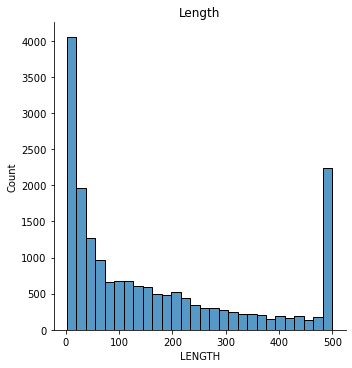

In [22]:
sns.displot(x='LENGTH',data=df)
plt.title('Length')
plt.show()

We can too much unecessary length is present.

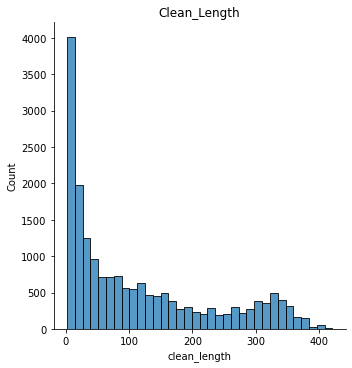

In [23]:
sns.displot(x='clean_length',data=df)
plt.title('Clean_Length')
plt.show()

Length is reduced  

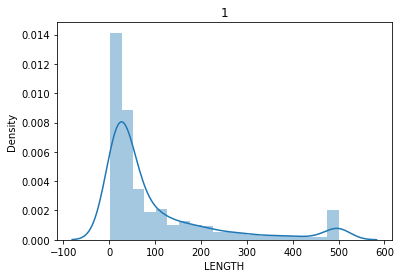

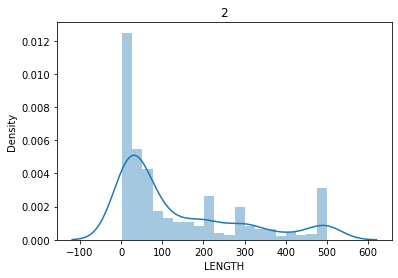

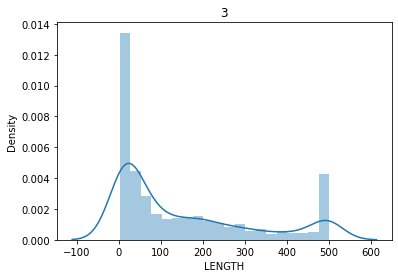

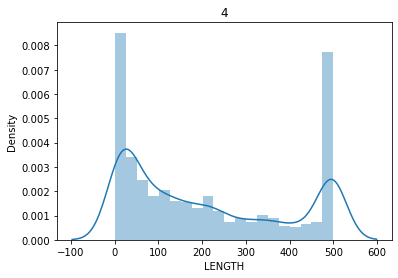

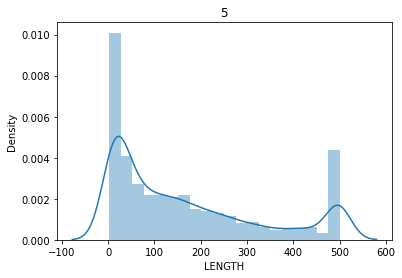

In [24]:
for i in range(1,6):
    sns.distplot(df[df['RATING']==i]['LENGTH'],bins=20)
    plt.title(i)
    plt.show()

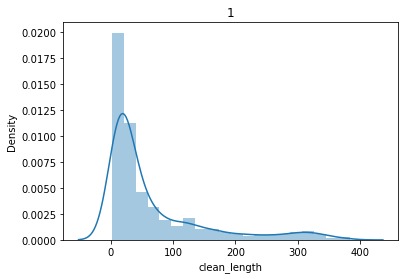

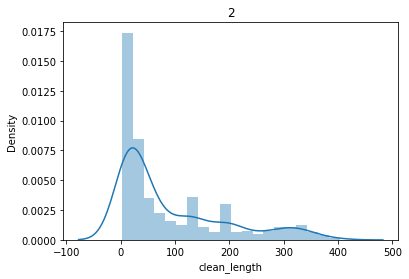

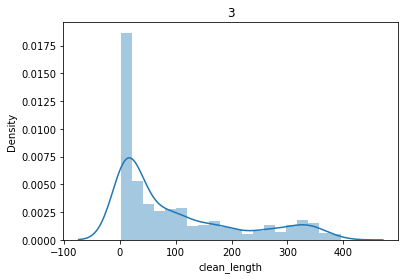

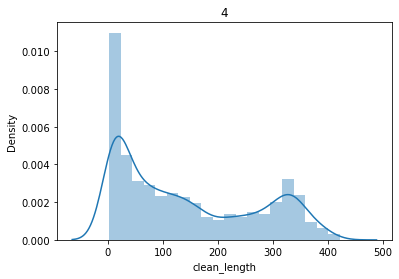

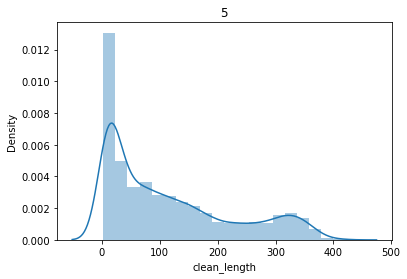

In [25]:
for i in range(1,6):
    sns.distplot(df[df['RATING']==i]['clean_length'],bins=20)
    plt.title(i)
    plt.show()

In [26]:
from wordcloud import WordCloud

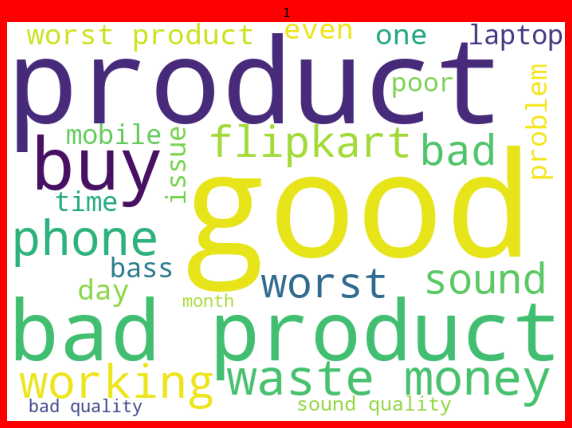

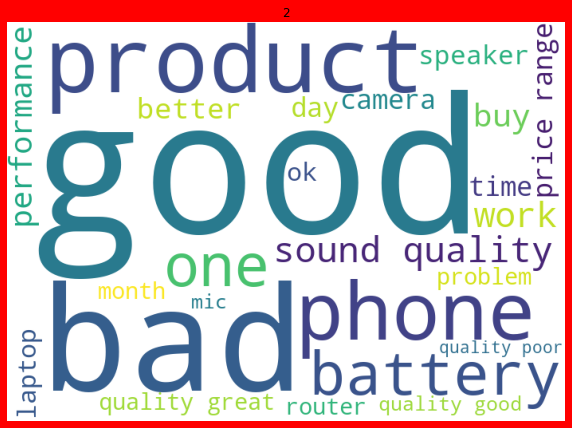

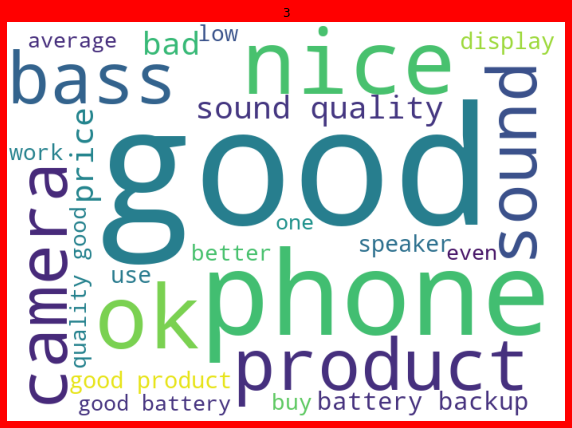

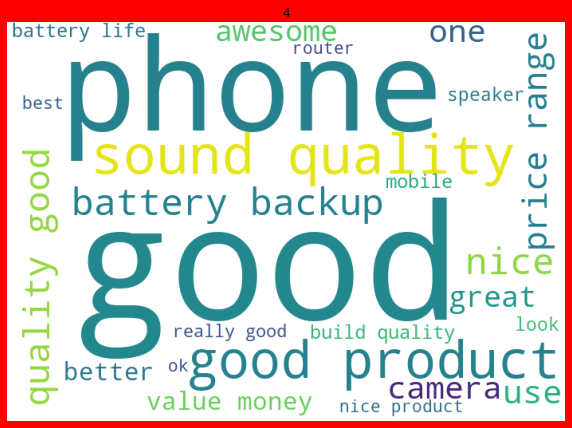

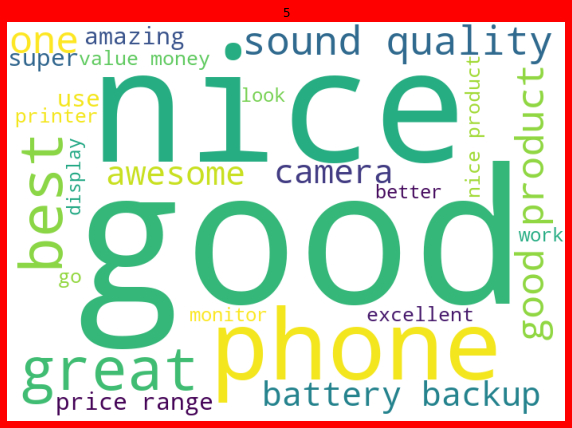

In [27]:
for i in range(1,6):
    rev = df['REVIEWS'][df['RATING']==i]

    rev_cloud = WordCloud(width=700,height=500,background_color='white',max_words=25).generate(' '.join(rev))

    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(rev_cloud)
    plt.axis('off')
    plt.title(i)
    plt.show()

In [28]:
stop_words = set(['phone','monitor','camera','laptop','router','printer','product','speaker'])

df['REVIEWS'] = df['REVIEWS'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

### MODEL SELECTION

In [29]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['REVIEWS'])

X = features
y = df['RATING']

In [30]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive = MultinomialNB()
naive.fit(X_train,Y_train)
y_pred= naive.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Final score = >  0.5961620469083155
              precision    recall  f1-score   support

           1       0.83      0.46      0.60       612
           2       1.00      0.06      0.11       184
           3       1.00      0.04      0.08       408
           4       0.63      0.33      0.43      1383
           5       0.56      0.97      0.71      2103

    accuracy                           0.60      4690
   macro avg       0.81      0.37      0.39      4690
weighted avg       0.67      0.60      0.54      4690



In [31]:
s=svm.SVC()
s.fit(X_train,Y_train)
y_pred= s.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Final score = >  0.7221748400852879
              precision    recall  f1-score   support

           1       0.80      0.75      0.78       612
           2       0.83      0.29      0.43       184
           3       0.77      0.32      0.45       408
           4       0.78      0.55      0.65      1383
           5       0.68      0.94      0.79      2103

    accuracy                           0.72      4690
   macro avg       0.77      0.57      0.62      4690
weighted avg       0.74      0.72      0.70      4690



### CROSS VALIDATION

In [32]:
cross=cross_val_score(svm.SVC(),X,y,cv=5)
print('SVC')
print('Score:',cross)
print('Mean_score:',cross.mean())
print('STD_score:',cross.std())

SVC
Score: [0.72308102 0.73827292 0.72761194 0.71561834 0.73687017]
Mean_score: 0.7282908779407226
STD_score: 0.00850226134404915


### HYPERPARAMETER TUNNING

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ['linear', 'poly', 'rbf'], 'C':[1,10]}
svc=svm.SVC()
Grid=GridSearchCV(svc,parameters)
Grid.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'poly', 'rbf']})

In [34]:
Grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [35]:
svc=svm.SVC(C=10)
svc.fit(X_train,Y_train)
y_pred= svc.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Final score = >  0.7326226012793177
              precision    recall  f1-score   support

           1       0.81      0.76      0.79       612
           2       0.73      0.40      0.51       184
           3       0.70      0.39      0.50       408
           4       0.75      0.60      0.67      1383
           5       0.71      0.91      0.80      2103

    accuracy                           0.73      4690
   macro avg       0.74      0.61      0.65      4690
weighted avg       0.74      0.73      0.72      4690



In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 468   16   11   36   81]
 [  51   73   13   15   32]
 [  25    7  160   63  153]
 [  14    2   27  827  513]
 [  20    2   16  157 1908]]


### SAVING THE BEST MODEL

In [38]:
import joblib

In [39]:
joblib.dump(svc,'Ratings_Prediction.pkl')

['Ratings_Prediction.pkl']